<a href="https://colab.research.google.com/github/Mattiabzz/PrevisioniMeteo/blob/main/Preivsioni_meteo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.python.keras.models  import Sequential
from tensorflow.python.keras import layers
from keras.layers import LSTM,Dense ,Dropout,Bidirectional,SimpleRNN,GRU
from keras.callbacks import EarlyStopping


import warnings
warnings.filterwarnings('ignore')

location="DataSetMod.csv" #il percorso del file

weather_df = pd.read_csv(location)

weather_df = weather_df.drop('RISK_MM', axis=1)#rimuovo la colonna risk_mm perchè è un dato artificiale

weather_df.head()
weather_df.shape
weather_df.info()

weather_df.columns

weather_df.rename(str.strip,
		axis='columns',
		inplace=True)

weather_df.columns

# Checking if the column contains
# any null values
for col in weather_df.columns:  #rimuovere i valori che vengono rilevati come null dentro il dataset

    # Checking if the column contains
    # any null values
    if weather_df[col].isnull().sum() > 0:
        val = weather_df[col].mean()
        weather_df[col] = weather_df[col].fillna(val)

weather_df.isnull().sum().sum()

# plt.figure(figsize=(10,10))
# sb.heatmap(weather_df.corr() > 0.8,
# 		annot=True,
# 		cbar=False)
# plt.show()

features = weather_df.drop(['Rainfall'], axis=1)
target = weather_df.Rainfall

print(features.shape)
print(target.shape)

# split the data
split = int(weather_df.shape[0] * 2 / 3)
df_train = weather_df.iloc[:split, :].copy()
df_test = weather_df.iloc[split:, :].copy()

# print(df_train.head())
# print(df_test.shape)

#Normalizzazione
sc = MinMaxScaler(feature_range=(0, 1))
df_train_sc = sc.fit_transform(df_train)
df_test_sc = sc.fit_transform(df_test)

future = 1
past = 30

X_train, y_train = [], []

for i in range(0,len(df_train_sc)-past-future+1):
    X_train.append(df_train_sc[i : i + past , 0])
    y_train.append(df_train_sc[i + past : i + past + future , 0 ])

X_train, y_train = np.array(X_train), np.array(y_train)

X_test, y_test = [], []

for i in range(0,len(df_test_sc)-past-future+1):
    X_test.append(df_test_sc[i : i + past , 0])
    y_test.append(df_test_sc[i + past : i + past + future , 0 ])



X_test, y_test = np.array(X_test), np.array(y_test)

X_train = np.reshape(X_train, [X_train.shape[0], X_train.shape[1], 1])
X_test = np.reshape(X_test, [X_test.shape[0], X_test.shape[1], 1])

epoche = 200
pazienza = 10

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2582 entries, 0 to 2581
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MinTemp         2464 non-null   float64
 1   MaxTemp         2464 non-null   float64
 2   Rainfall        2464 non-null   float64
 3   Evaporation     2464 non-null   float64
 4   Sunshine        2464 non-null   float64
 5   WindGustDirSin  2464 non-null   float64
 6   WindGustDirCos  2464 non-null   float64
 7   WindGustSpeed   2464 non-null   float64
 8   WindDir9amSin   2464 non-null   float64
 9   WindDir9amCos   2464 non-null   float64
 10  WindDir3pmSin   2464 non-null   float64
 11  WindDir3pmCos   2464 non-null   float64
 12  WindSpeed9am    2464 non-null   float64
 13  WindSpeed3pm    2464 non-null   float64
 14  Humidity9am     2464 non-null   float64
 15  Humidity3pm     2464 non-null   float64
 16  Pressure9am     2464 non-null   float64
 17  Pressure3pm     2464 non-null   f

In [ ]:
print("inizio modello 1")

# build and train the model
model1 = Sequential()
model1.add(LSTM(units=past, return_sequences=True, input_shape=X_train.shape[1:]))#input
# model1.add(Dropout(0.5))
model1.add(LSTM(units=past, return_sequences=True, activation='relu'))#1
# model1.add(Dropout(0.5))
model1.add(LSTM(units=past, return_sequences=True, activation='relu'))#2
model1.add(Dropout(0.5))
model1.add(layers.Dense(units = future, activation='linear')) #output layer

model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

history1 = model1.fit(X_train, y_train, epochs=epoche, batch_size=32, validation_data=(X_test, y_test))

inizio modello 1
Epoch 1/200
53/53 [==============================] - 10s 81ms/step - loss: 0.0993 - mse: 0.0993 - val_loss: 0.0557 - val_mse: 0.0557
Epoch 2/200
53/53 [==============================] - 2s 45ms/step - loss: 0.0540 - mse: 0.0540 - val_loss: 0.0388 - val_mse: 0.0388
Epoch 3/200
53/53 [==============================] - 2s 46ms/step - loss: 0.0443 - mse: 0.0443 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 4/200
53/53 [==============================] - 2s 46ms/step - loss: 0.0377 - mse: 0.0377 - val_loss: 0.0274 - val_mse: 0.0274
Epoch 5/200
53/53 [==============================] - 2s 46ms/step - loss: 0.0328 - mse: 0.0328 - val_loss: 0.0258 - val_mse: 0.0258
Epoch 6/200
53/53 [==============================] - 5s 95ms/step - loss: 0.0301 - mse: 0.0301 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 7/200
53/53 [==============================] - 5s 87ms/step - loss: 0.0283 - mse: 0.0283 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 8/200
53/53 [==============================] - 5s 10

In [ ]:
print("inizio modello 2")

# model1.summary()

model2 = Sequential()
model2.add(LSTM(units=past, return_sequences=True, input_shape=X_train.shape[1:]))#input
model2.add(LSTM(units=past, return_sequences=True, activation='relu'))#1
model2.add(LSTM(units=past, return_sequences=True, activation='relu'))#2
model2.add(layers.Dense(units = future, activation='linear')) #output layer

model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])



earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=pazienza)
history2 = model2.fit(X_train,y_train,epochs = epoche,batch_size=32,validation_data=(X_test,y_test) ,verbose=2,callbacks=[earlyStop])

inizio modello 2
Epoch 1/200
53/53 - 8s - loss: 0.1124 - mse: 0.1124 - val_loss: 0.0572 - val_mse: 0.0572
Epoch 2/200
53/53 - 2s - loss: 0.0406 - mse: 0.0406 - val_loss: 0.0398 - val_mse: 0.0398
Epoch 3/200
53/53 - 3s - loss: 0.0318 - mse: 0.0318 - val_loss: 0.0324 - val_mse: 0.0324
Epoch 4/200
53/53 - 2s - loss: 0.0273 - mse: 0.0273 - val_loss: 0.0289 - val_mse: 0.0289
Epoch 5/200
53/53 - 2s - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 6/200
53/53 - 2s - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0251 - val_mse: 0.0251
Epoch 7/200
53/53 - 2s - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0239 - val_mse: 0.0239
Epoch 8/200
53/53 - 2s - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0255 - val_mse: 0.0255
Epoch 9/200
53/53 - 3s - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 10/200
53/53 - 2s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 11/200
53/53 - 2s - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0215 - val_mse: 0.0215
Ep

In [ ]:
print("inizio modello 3")

model3 = Sequential()
model3.add(GRU(units=past, return_sequences=True, input_shape=X_train.shape[1:]))#input
# model3.add(Dropout(0.5))
model3.add(GRU(units=past, return_sequences=True, activation='relu'))#1
# model3.add(Dropout(0.5))
model3.add(GRU(units=past, return_sequences=True, activation='relu'))#2
model3.add(Dropout(0.5))
model3.add(layers.Dense(units = future, activation='linear')) #output layer

model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

history3 = model3.fit(X_train, y_train, epochs=epoche, batch_size=32, validation_data=(X_test, y_test))

inizio modello 3
Epoch 1/200
53/53 [==============================] - 9s 62ms/step - loss: 0.1034 - mse: 0.1034 - val_loss: 0.0347 - val_mse: 0.0347
Epoch 2/200
53/53 [==============================] - 2s 46ms/step - loss: 0.0449 - mse: 0.0449 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 3/200
53/53 [==============================] - 3s 48ms/step - loss: 0.0377 - mse: 0.0377 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 4/200
53/53 [==============================] - 3s 66ms/step - loss: 0.0336 - mse: 0.0336 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 5/200
53/53 [==============================] - 3s 47ms/step - loss: 0.0307 - mse: 0.0307 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 6/200
53/53 [==============================] - 2s 47ms/step - loss: 0.0291 - mse: 0.0291 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 7/200
53/53 [==============================] - 3s 47ms/step - loss: 0.0283 - mse: 0.0283 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 8/200
53/53 [==============================] - 2s 47m

In [ ]:
print("inizio modello 4")

model4 = Sequential()
model4.add(GRU(units=past, return_sequences=True, input_shape=X_train.shape[1:]))#input
model4.add(GRU(units=past, return_sequences=True, activation='relu'))#1
model4.add(GRU(units=past, return_sequences=True, activation='relu'))#2
model4.add(layers.Dense(units = future, activation='linear')) #output layer

model4.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])


history4 = model4.fit(X_train,y_train,epochs = epoche,batch_size=32,validation_data=(X_test,y_test) ,verbose=2,callbacks=[earlyStop])

inizio modello 4
Epoch 1/200
53/53 - 8s - loss: 0.0793 - mse: 0.0793 - val_loss: 0.0324 - val_mse: 0.0324
Epoch 2/200
53/53 - 2s - loss: 0.0260 - mse: 0.0260 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 3/200
53/53 - 2s - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 4/200
53/53 - 3s - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 5/200
53/53 - 2s - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 6/200
53/53 - 2s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0179 - val_mse: 0.0179
Epoch 7/200
53/53 - 2s - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0179 - val_mse: 0.0179
Epoch 8/200
53/53 - 2s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 9/200
53/53 - 3s - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0176 - val_mse: 0.0176
Epoch 10/200
53/53 - 2s - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 11/200
53/53 - 2s - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0176 - val_mse: 0.0176
Ep

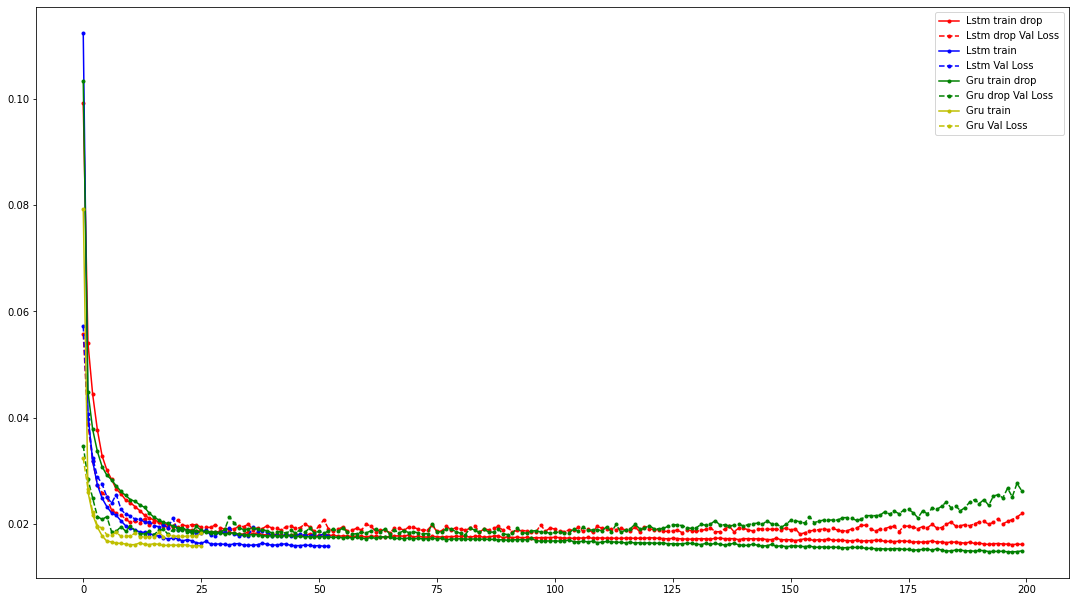

In [ ]:
plt.rcParams['figure.figsize'] = [18.5, 10.5]

fig, ax = plt.subplots()
ax.plot(history1.history["loss"],'r', marker='.', label="Lstm train drop")
ax.plot(history1.history["val_loss"],'r--', marker='.', label="Lstm drop Val Loss")
ax.plot(history2.history["loss"],'b', marker='.', label="Lstm train")
ax.plot(history2.history["val_loss"],'b--', marker='.', label="Lstm Val Loss")
ax.plot(history3.history["loss"],'g', marker='.', label="Gru train drop")
ax.plot(history3.history["val_loss"],'g--', marker='.', label="Gru drop Val Loss")
ax.plot(history4.history["loss"],'y', marker='.', label="Gru train")
ax.plot(history4.history["val_loss"],'y--', marker='.', label="Gru Val Loss")
ax.legend()

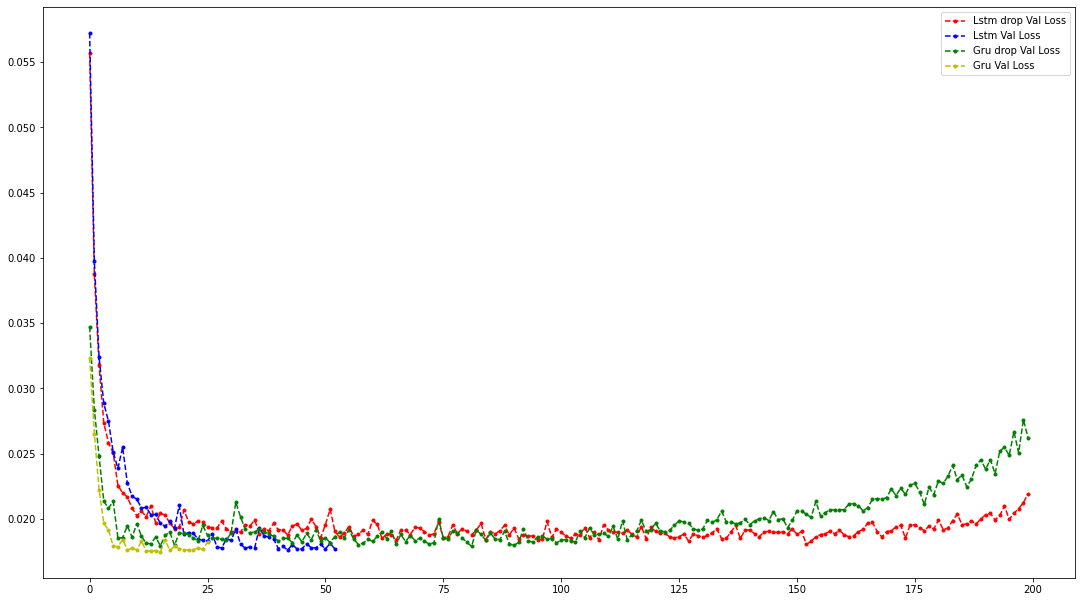

In [ ]:
fig, ax = plt.subplots()
# ax.plot(history1.history["loss"],'r', marker='.', label="Lstm train drop")
ax.plot(history1.history["val_loss"],'r--', marker='.', label="Lstm drop Val Loss")
# ax.plot(history2.history["loss"],'b', marker='.', label="Lstm train")
ax.plot(history2.history["val_loss"],'b--', marker='.', label="Lstm Val Loss")
# ax.plot(history3.history["loss"],'g', marker='.', label="Gru train drop")
ax.plot(history3.history["val_loss"],'g--', marker='.', label="Gru drop Val Loss")
# ax.plot(history4.history["loss"],'p', marker='.', label="Gru train")
ax.plot(history4.history["val_loss"],'y--', marker='.', label="Gru Val Loss")
ax.legend()

In [ ]:
print(model1.evaluate(X_test, y_test))
print(model2.evaluate(X_test, y_test))
print(model3.evaluate(X_test, y_test))
print(model4.evaluate(X_test, y_test))


26/26 [==============================] - 1s 20ms/step - loss: 0.0219 - mse: 0.0219
[0.021925227716565132, 0.021925227716565132]
26/26 [==============================] - 1s 21ms/step - loss: 0.0177 - mse: 0.0177
[0.01768951117992401, 0.01768951117992401]
26/26 [==============================] - 0s 18ms/step - loss: 0.0262 - mse: 0.0262
[0.02621295675635338, 0.02621295675635338]
26/26 [==============================] - 1s 17ms/step - loss: 0.0182 - mse: 0.0182
[0.018217045813798904, 0.018217045813798904]
